In [48]:
import nlp_utils
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

## Preprocessing

In [2]:
# Load parsed news dataset
dataset = nlp_utils.NewsTextDataset()
dataset.load("/home/alexander/HSE_Stuff/NLP-Course/datasets/final_dataset_4k.json")

In [3]:
# Before preprocessing
dataset[0].text

'Сооснователь и в прошлом многолетний руководитель Microsoft Билл Гейтс стал крупнейшим частным владельцем сельскохозяйственных угодий в США, пишет российское издание журнала Forbes со ссылкой на The Land Report.\nГейтс скупал сельскохозяйственные угодья на протяжении нескольких лет, и сейчас ему принадлежат участки в 19 штатах, подсчитало издание. Крупнейшие расположены в Луизиане (280 кв. км), Арканзасе (194 кв. км) и Небраске (83 кв. км). Земли напрямую или опосредованно принадлежат Cascade Investments - инвестиционному фонду, который инвестирует средства семьи Гейтса, указал The Land Report.\nЧасть участков предприниматель скупает через подконтрольный ему инвестиционный фонд Cascade Investment.\nCascade Investments не ответил на запрос Forbes USA. Как именно используются принадлежащие Гейтсу земли, до конца неясно. Журнал обращает внимание, что "дочка" Cascade Cottonwood Ag Management входит в некоммерческую организацию Leading Harvest, которая выступает за защиту культур, почвы и 

In [4]:
# Preprocessing
dataset.preprocess()

3999it [00:43, 91.88it/s] 


In [15]:
# After preprocessing (only fixe first words)
dataset[0].tokenized_text[:5]

['сооснователь', 'прошлый', 'многолетний', 'руководитель', 'билл']

In [5]:
# We can load & save dataset
dataset.save("/home/alexander/HSE_Stuff/NLP-Course/datasets/final_dataset_4k_tokenized.json")

In [3]:
dataset = nlp_utils.NewsTextDataset()
dataset.load("/home/alexander/HSE_Stuff/NLP-Course/datasets/final_dataset_4k_cleaned.json")

In [6]:
data = dataset.dump_to_pandas()

In [7]:
data

,category,tokenized_text
0,экономика,"[сооснователь, прошлый, многолетний, руководит..."
1,экономика,"[минэкономразвития, дорабатывать, вносить, пра..."
2,экономика,"[счет, который, открывать, российский, граждан..."
3,экономика,"[российский, рубль, являться, самый, недооцени..."
4,экономика,"[российский, онлайн, кинотеатр, откладывать, н..."
...,...,...
3994,спорт,"[нападающий, ска, санкт-петербург, антон, бурд..."
3995,спорт,"[матч, реванш, временный, чемпион, версия, все..."
3996,спорт,"[финский, клуб, йокерит, продолжать, соблюдать..."
3997,спорт,"[против, бывший, футболист, сборная, россия, р..."


In [9]:
data.groupby('category').count()

,tokenized_text
category,
культура,1000
спорт,1000
технологии,1000
экономика,999


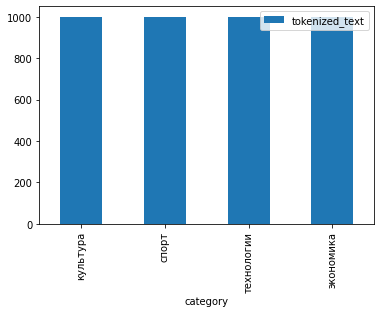

In [10]:
data.groupby('category').count().plot.bar(ylim=0)
plt.show()

## Сlassification

### Logistic Regression

In [21]:
def convert_list_to_string(org_list, seperator=' '):
    return seperator.join(org_list)

In [23]:
data['tokenized_text'].apply(convert_list_to_string)

0       сооснователь прошлый многолетний руководитель ...
1       минэкономразвития дорабатывать вносить правите...
2       счет который открывать российский гражданин ко...
3       российский рубль являться самый недооценивать ...
4       российский онлайн кинотеатр откладывать неопре...
                              ...                        
3994    нападающий ска санкт-петербург антон бурдасов ...
3995    матч реванш временный чемпион версия всемирный...
3996    финский клуб йокерит продолжать соблюдать двух...
3997    против бывший футболист сборная россия роман ш...
3998    тель-авив хайфа готовый рассматривать вопрос с...
Name: tokenized_text, Length: 3999, dtype: object

In [25]:
data['tokenized_text'] = data['tokenized_text'].apply(convert_list_to_string)

In [26]:
data

,category,tokenized_text
0,экономика,сооснователь прошлый многолетний руководитель ...
1,экономика,минэкономразвития дорабатывать вносить правите...
2,экономика,счет который открывать российский гражданин ко...
3,экономика,российский рубль являться самый недооценивать ...
4,экономика,российский онлайн кинотеатр откладывать неопре...
...,...,...
3994,спорт,нападающий ска санкт-петербург антон бурдасов ...
3995,спорт,матч реванш временный чемпион версия всемирный...
3996,спорт,финский клуб йокерит продолжать соблюдать двух...
3997,спорт,против бывший футболист сборная россия роман ш...


In [27]:
vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
print('SOme')
final_features = vectorizer.fit_transform(data['tokenized_text'])

SOme


In [28]:
final_features.shape

(3999, 69696)

In [29]:
from sklearn.linear_model import LogisticRegression
X = data['tokenized_text']
Y = data['category']

In [30]:
Y

0       экономика
1       экономика
2       экономика
3       экономика
4       экономика
          ...    
3994        спорт
3995        спорт
3996        спорт
3997        спорт
3998        спорт
Name: category, Length: 3999, dtype: object

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
y_test.shape

(800,)

In [40]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

In [41]:
log_reg_model = pipeline.fit(X_train, y_train)

In [46]:
import pickle
with open('models_weights/LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [49]:
ytest = np.array(y_test)

In [51]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

    культура       0.97      0.96      0.96       212
       спорт       0.97      0.97      0.97       179
  технологии       0.96      0.94      0.95       205
   экономика       0.93      0.97      0.95       204

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800

[[203   5   1   3]
 [  3 174   0   2]
 [  3   0 193   9]
 [  0   0   7 197]]


### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', KNeighborsClassifier(n_neighbors=7))])

In [61]:
knn_model = pipeline.fit(X_train, y_train)

In [62]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, knn_model.predict(X_test)))
print(confusion_matrix(ytest, knn_model.predict(X_test)))

              precision    recall  f1-score   support

    культура       0.98      0.93      0.95       212
       спорт       0.98      0.95      0.96       179
  технологии       0.91      0.94      0.93       205
   экономика       0.92      0.96      0.94       204

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

[[197   3  10   2]
 [  4 170   0   5]
 [  1   0 193  11]
 [  0   1   8 195]]


### SVM

In [63]:
from sklearn.svm import SVC

In [70]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', SVC(gamma='auto'))])

In [71]:
svm_model = pipeline.fit(X_train, y_train)

In [72]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, svm_model.predict(X_test)))
print(confusion_matrix(ytest, svm_model.predict(X_test)))

/home/alexander/HSE_Stuff/envs/nlp-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexander/HSE_Stuff/envs/nlp-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexander/HSE_Stuff/envs/nlp-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

    культура       0.00      0.00      0.00       212
       спорт       0.22      1.00      0.37       179
  технологии       0.00      0.00      0.00       205
   экономика       0.00      0.00      0.00       204

    accuracy                           0.22       800
   macro avg       0.06      0.25      0.09       800
weighted avg       0.05      0.22      0.08       800

[[  0 212   0   0]
 [  0 179   0   0]
 [  0 205   0   0]
 [  0 204   0   0]]


### Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [77]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', GaussianNB())])

In [81]:
nb_model = pipeline.fit(X_train, y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.